<a href="https://colab.research.google.com/github/gauravpks/ml-repo/blob/master/Model%20Selection%20_%20Boosting/XGBoost/xg_boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bagging and boosting**

Bagging is a way to decrease the variance in the prediction by generating additional data for training from dataset using combinations with repetitions to produce multi-sets of the original data. Boosting is an iterative technique which adjusts the weight of an observation based on the last classification.

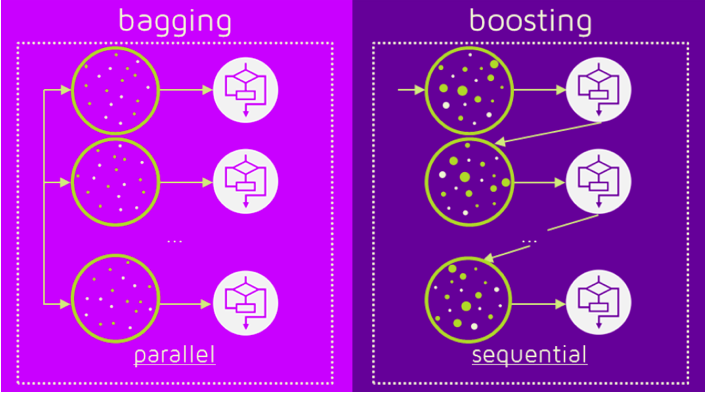

#Boosting 

In machine learning, boosting is an ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones

To convert weak learner to strong learner, we’ll combine the prediction of each weak learner using methods like:
1. Using average/ weighted average
2. Considering prediction has higher vote


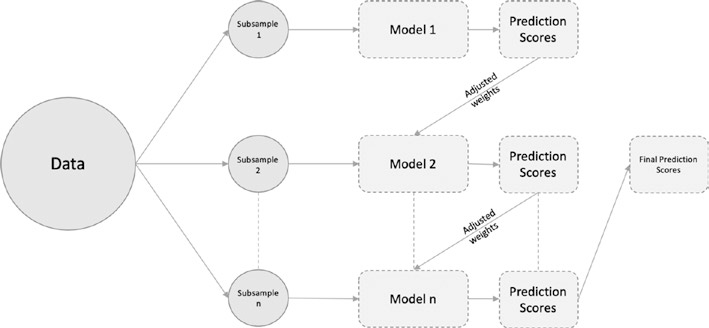

**How Boosting Algorithms works?**

Now we know that, boosting combines weak learner a.k.a. base learner to form a strong rule. An immediate question which should pop in your mind is, ‘How boosting identify weak rules?‘

To find weak rule, we apply base learning (ML) algorithms with a different distribution. Each time base learning algorithm is applied, it generates a new weak prediction rule. This is an iterative process. After many iterations, the boosting algorithm combines these weak rules into a single strong prediction rule.

Here’s another question which might haunt you, ‘How do we choose different distribution for each round?’

For choosing the right distribution, here are the following steps:

Step 1:  The base learner takes all the distributions and assign equal weight or attention to each observation.

Step 2: If there is any prediction error caused by first base learning algorithm, then we pay higher attention to observations having prediction error. Then, we apply the next base learning algorithm.

Step 3: Iterate Step 2 till the limit of base learning algorithm is reached or higher accuracy is achieved.

Finally, it combines the outputs from weak learner and creates  a strong learner which eventually improves the prediction power of the model. Boosting pays higher focus on examples which are mis-classiﬁed or have higher errors by preceding weak rules.

**Types of Boosting Algorithms**

Underlying engine used for boosting algorithms can be anything.  It can be decision stamp, margin-maximizing classification algorithm etc. There are many boosting algorithms which use other types of engine such as:

1. AdaBoost (Adaptive Boosting)
2. Gradient Tree Boosting
3. XGBoost


#AdaBoost

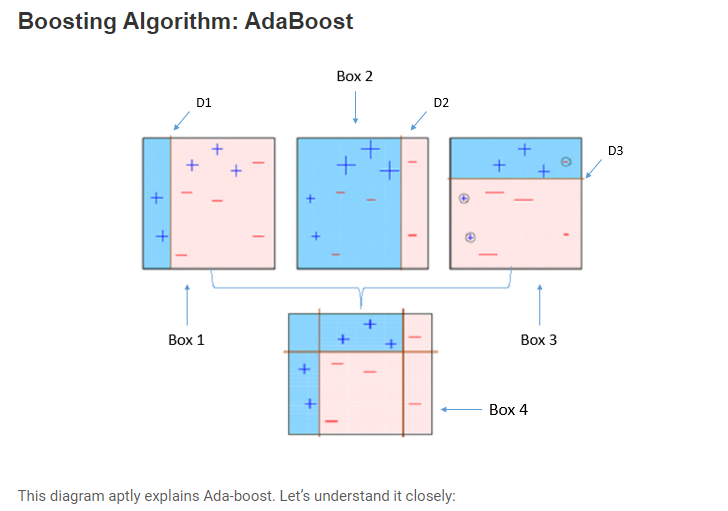

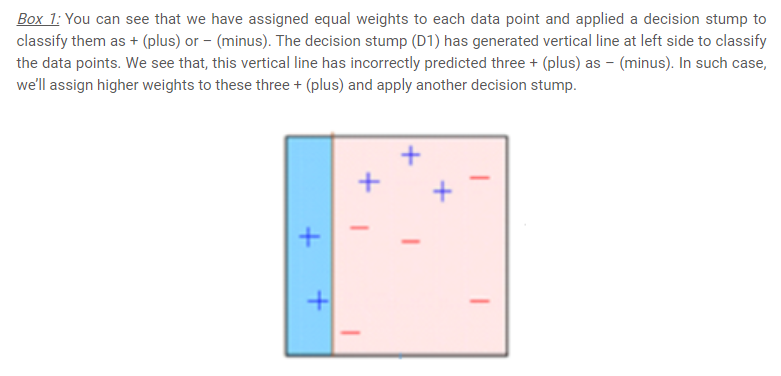

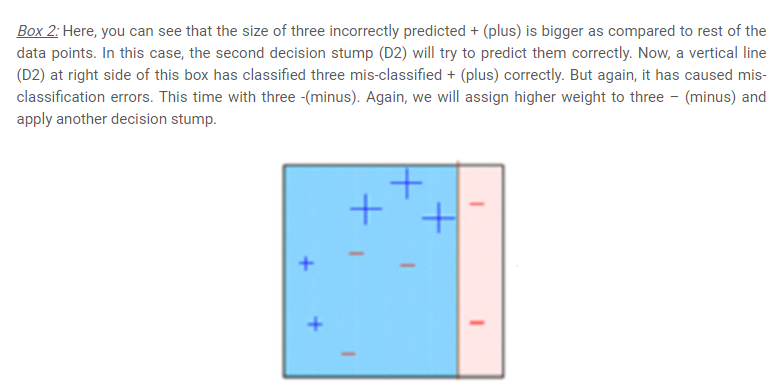

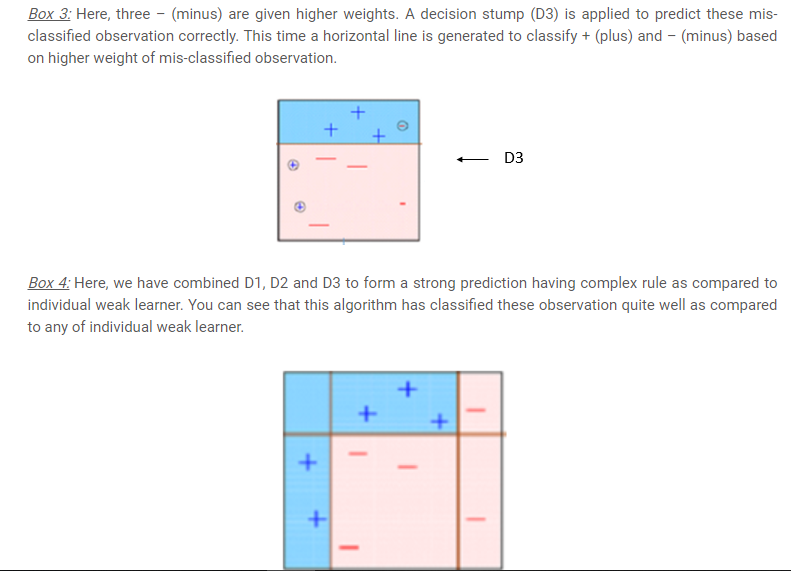

# XGBoost

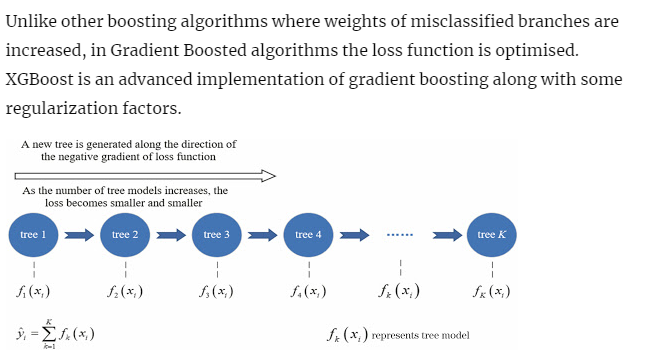

#Code

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/gauravpks/ml-repo/master/Model%20Selection%20_%20Boosting/Classification/Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training XGBoost on the Training set

In [4]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Making the Confusion Matrix

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[84  3]
 [ 0 50]]


0.9781021897810219

## Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.53 %
Standard Deviation: 2.07 %


#AdaBoost Classifier 

In [8]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[84  3]
 [ 2 48]]


0.9635036496350365

In [10]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.15 %
Standard Deviation: 2.77 %


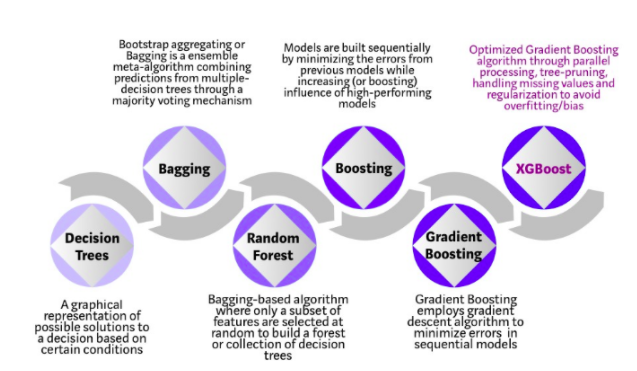